- 내가 생각하는 데이터의 분포 -> 귀무가설
- 귀무가설의 분포에서 데이터가 나왔다고 가정
- 수식을 통해(통계량 계산식) 데이터 분포에서 계산
- 자주 나오지 않는 값이 나온 경우
    - 어쩌다가 낮은 확률로 나왔다
    - 귀무가설이 틀렸다
        - 자주 나오는 부분에 가까운지 자주 안나오는 부분에 가까운지 나타냄 : 유의 확률
        - 유의확률이 작으면 면적이 작다 
        - 잘 안나오는 부분에서 나온 값일 것이다 
        - 귀무가설이 틀렸을 것이다

In [2]:
from matplotlib import rc

plt.style.use('seaborn')
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [1]:
%matplotlib inline

In [3]:
#  공정하다 = 귀무가설 -> H0 : theta = 0.5
N = 10
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)

for n in range(11):
    print(sp.stats.binom_test(n, N))

0.001953125
0.021484374999999997
0.10937500000000003
0.3437499999999999
0.7539062500000002
1.0
0.7539062500000002
0.3437499999999999
0.10937500000000003
0.021484374999999997
0.001953125


##### P-value의 문제
- 데이터가 많으면 기준값에서 조금만 벗어나도 아니다 라는 결론이 나옴
- 데이터가 많아지면 웬만한 기준값을 잡았을때 귀무가설이 다 틀리게 됨

##### 연습문제 9.5.3

In [10]:
pvalues = []
N_range = range(1050, 1100)
for N in N_range:
    n = int(round(0.7 * N))
    pvalues.append(sp.stats.binom_test(n, N, p = 2 / 3, alternative = "greater"))
    
print(pvalues)

[0.011464662597118428, 0.010846034615784173, 0.012217718177775585, 0.011564180538640948, 0.01094167928669868, 0.012321524333038038, 0.011664010094599086, 0.011037636584668248, 0.010441170999066619, 0.011764149174270057, 0.011133904510498775, 0.010533671497389785, 0.011864595691550744, 0.011230481068759738, 0.01062648120851794, 0.010051397672693956, 0.011327364267820184, 0.010719598230985904, 0.010140850920599142, 0.011424552119955684, 0.010813020666259162, 0.010230609757981074, 0.011522042641581461, 0.010906746618812125, 0.010320672377846812, 0.011619833853149249, 0.011000774196259604, 0.010411036975530464, 0.00984945696958764, 0.011095101509538137, 0.010501701748552889, 0.009936559119073063, 0.011189726672880006, 0.010592664896908474, 0.010023959616883458, 0.009482478261132455, 0.010683924623092858, 0.010111656750687655, 0.009566711347876783, 0.01077547913230246, 0.010199648809811886, 0.009651238978859151, 0.01086732663244833, 0.010287934085446038, 0.009736059528705663, 0.010959465334

##### 검정
- 표본조사를 한 1000명 중 520명이 찬성하였다. 전체 인구가 찬성이 더 많다고 말할 수 있는가?
- 귀무가설 H_0 : theta = 0.5
- 대립가설 H_a : theta > 0.5
- 양측 / 단측 -> 우측 검정
- 유의확률

In [11]:
# 위의 유의 확률
sp.stats.binom_test(520, 1000, 0.5, "greater")

0.10872414660212008

#### 이항검정
- 1000가구 표본조사에서 40가구가 신청하고 있다. 시청률이 5%라고 할수 있는가? (유의수준 5%)
- 귀무가설 H_0 : theta = 0.05
- 대립가설 H_a : theta =! 0.05

In [21]:
# 유의 확률 16% 귀무가설 채택
# 시청률 조사나 설문조사를 하게 되면 
# 시청률은 4%가 나왔고 유의수준 5%에서 오차범위 +- 3% 입니다 식으로 표현
sp.stats.binom_test(40, 1000, 0.027)

0.014554102575329554

#### 카이제곱 검정

In [24]:
N = 5
K = 6
mu_0 = np.ones(K)/K
np.random.seed(0)
x = np.array([0, 0, 0, 0, 0, 5])
n = np.bincount(x, minlength=K)
sp.stats.chisquare(n)

Power_divergenceResult(statistic=20.0, pvalue=0.0012497305630313773)

#### 카이제곱 독립검정
- 어떤 범주형 확률변수 X가 다른 범주형 확률변수 Y와 독립인지 상관관계를 가지는가 검증에 사용

In [26]:
# 유의 확률이 0이면 반드시 관계가 있다고 볼 수 있음
obs = np.array([[10500, 9500], [10000, 10000]])
sp.stats.chi2_contingency(obs)

(24.915672295184493,
 5.989353816039278e-07,
 1,
 array([[10250.,  9750.],
        [10250.,  9750.]]))

#### 선형 회귀 분석 연습문제 4.1.1

In [33]:
from sklearn.datasets import fetch_california_housing
caldata = fetch_california_housing()

In [38]:
dfX = pd.DataFrame(caldata.data, columns = caldata.feature_names)

In [40]:
dfX

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [36]:
dfy = pd.DataFrame(caldata.target, columns=["Price"])
dfy

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [41]:
df = pd.concat([dfX, dfy], axis = 1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [42]:
import statsmodels.api as sm

In [43]:
formula = "Price ~ " + " + ".join(caldata.feature_names)
formula

'Price ~ MedInc + HouseAge + AveRooms + AveBedrms + Population + AveOccup + Latitude + Longitude'

In [44]:
model = sm.OLS.from_formula(formula, data = df)

In [45]:
result = model.fit()

In [46]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sat, 16 May 2020   Prob (F-statistic):               0.00
Time:                        12:27:52   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9419      0.659    -56.067      0.0

In [50]:
# 스케일링
feature_names = list(caldata.feature_names)
feature_names = ["scale({})".format(name) for name in feature_names]

formula = "Price ~ " + " + ".join(feature_names)
model2 = sm.OLS.from_formula(formula, data = df)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sat, 16 May 2020   Prob (F-statistic):               0.00
Time:                        12:46:13   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.0686      0.00

#### 연습문제

In [55]:
data = sm.datasets.get_rdataset("Diamonds", package = "Stat2Data")
df = data.data
df.tail()

,Carat,Color,Clarity,Depth,PricePerCt,TotalPrice
346,0.80,H,VVS2,69.9,3645.0,2916.0
347,0.97,G,VVS1,70.0,5177.3,5021.9
348,1.25,G,VS2,71.9,5607.9,7009.9
349,1.52,F,VS1,70.4,7634.3,11604.1
350,1.72,G,VS1,69.1,8081.1,13899.5


In [71]:
model = sm.OLS.from_formula(
    "TotalPrice ~ scale(Carat) + scale(I(Carat**2)) + scale(Depth) + C(Color) + C(Clarity) + 0", data = df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     540.6
Date:                Sat, 16 May 2020   Prob (F-statistic):          1.14e-227
Time:                        13:11:57   Log-Likelihood:                -3064.6
No. Observations:                 351   AIC:                             6163.
Df Residuals:                     334   BIC:                             6229.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
C(Color)[D]           9314.7288 

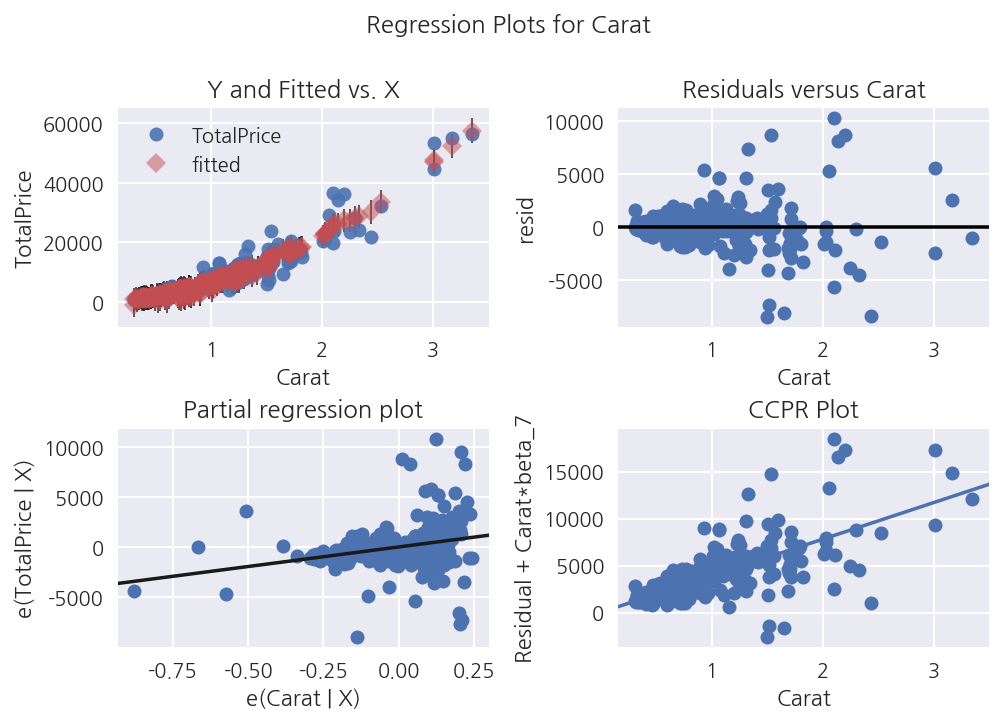

In [66]:
fig = sm.graphics.plot_regress_exog(result, "Carat")
plt.tight_layout(pad = 4, h_pad=0.5, w_pad=0.5)
plt.show()